In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
string = 'dc'
depth_idx = 40

In [4]:
# load original table
table_5d = np.load('/data/icecube/retro_tables/large_5d_notilt_combined/large_5d_notilt_string_%s_depth_%s/ckv_table.npy'%(string, depth_idx), mmap_mode='r')

In [5]:
# templates
templates = np.load('../table_compression/final_templates.npy')

In [6]:
# idx, weight map
template_map = np.load('/data/icecube/retro_tables/large_5d_notilt_combined/large_5d_notilt_string_%s_depth_%s/ckv_template_map.npy'%(string, depth_idx))

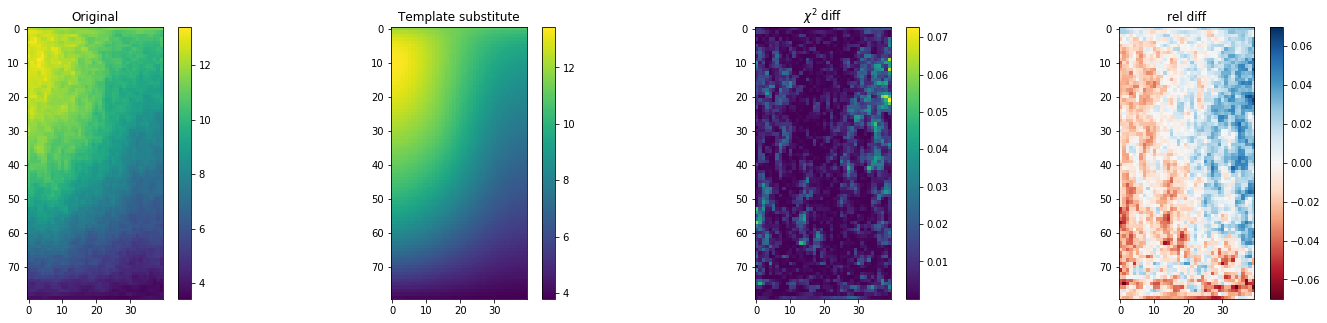

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(25, 5), ncols=4)

r_idx = 15
cz_idx = 5
t_idx = 15

A = table_5d[r_idx, cz_idx, t_idx]
index, weight = template_map[r_idx, cz_idx, t_idx]
B = templates[index] * weight

im1 = ax1.imshow(A)
cbar = plt.colorbar(im1, ax=ax1)
ax1.set_title('Original')
im2 = ax2.imshow(B)
cbar = plt.colorbar(im2, ax=ax2)
ax2.set_title('Template substitute')
im3 = ax3.imshow(np.square(A-B)/(A+B))
cbar = plt.colorbar(im3, ax=ax3)
ax3.set_title(r'$\chi^2$ diff')
im4 = ax4.imshow((A-B)/(A+B), vmin=-np.max(np.abs(A-B)/(A+B)), vmax=np.max(np.abs(A-B)/(A+B)), cmap='RdBu')
cbar = plt.colorbar(im4, ax=ax4)
ax4.set_title('rel diff')